<a href="https://colab.research.google.com/github/superchromat/901/blob/main/MCK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook for data analysis for 901.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

In [79]:
df = pd.read_csv("https://raw.githubusercontent.com/superchromat/901/main/MCK.csv")
df

,Acceleration,Velocity,Position,Force
0,0.160962,-0.482996,45.158492,42.924609
1,0.155914,-0.327082,44.831410,55.068349
2,0.150866,-0.176215,44.655195,66.607411
3,0.145818,-0.030397,44.624799,77.556175
4,0.140771,0.110374,44.735173,87.929025
...,...,...,...,...
99,-0.034629,0.085888,183.456690,10.286581
100,-0.033274,0.052614,183.509304,8.326980
101,-0.031919,0.020696,183.530000,6.420293
102,-0.030563,-0.009868,183.520132,4.565424


In [80]:
df.describe()

,Acceleration,Velocity,Position,Force
count,104.000000,104.000000,104.000000,104.000000
mean,0.005816,1.325380,122.085437,117.811368
std,0.062385,0.807526,50.455441,64.187470
min,-0.050069,-0.482996,44.624799,2.761275
25%,-0.044106,0.627002,72.631178,60.910946
50%,-0.025422,1.481611,130.152720,125.734657
75%,0.045148,2.081039,172.121310,179.353106
max,0.160962,2.307929,183.530000,199.769691


In [81]:
'''
scaler = MinMaxScaler()
df_features = ['Acceleration','Velocity', 'Position', 'Force']
# column transformer
df_scaler = ColumnTransformer([
        ('num features', scaler, df_features),], remainder='passthrough')
df = df_scaler.fit_transform(df)
df = pd.DataFrame(df, columns=df_features)  
'''

"\nscaler = MinMaxScaler()\ndf_features = ['Acceleration','Velocity', 'Position', 'Force']\n# column transformer\ndf_scaler = ColumnTransformer([\n        ('num features', scaler, df_features),], remainder='passthrough')\ndf = df_scaler.fit_transform(df)\ndf = pd.DataFrame(df, columns=df_features)  \n"

In [82]:
# independent values
X = df[['Acceleration','Velocity', 'Position']]
# dependent values
y = df['Force']

In [83]:
y.shape

(104,)

Using Linear Regression

In [84]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X,y)
#print('Intercept: \n', reg.intercept_)
print('Coefficients:\n M                 C              K \n', reg.coef_)

Coefficients:
 M                 C              K 
 [5.95702639e+02 7.71863176e+01 9.81823602e-02]


Using a support vector regression with a polynomial kernel.

In [85]:

svr = SVR(kernel = 'linear', degree=3)
svr.fit(X, y)
print('Coefficients:\n M                 C              K \n', svr.coef_)
print('Intercept: \n', svr.intercept_)

Coefficients:
 M                 C              K 
 [[-1.41774257 49.11557141 -0.79731318]]
Intercept: 
 [152.9892499]


Using SGD Regression

In [86]:
sgd = SGDRegressor(loss='squared_error', fit_intercept=False, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
sgd.fit(X, y)
print('Coefficients:\n M                 C              K \n', sgd.coef_)

Coefficients:
 M                 C              K 
 [-9.95597191e+09 -4.72783072e+10  2.09846887e+11]


This output includes the intercept and coefficients. We can use this information to build the multiple linear regression equation as follows:

Force = (Intercept) + (M_coef)*Acceleration + (C_coef)*Velocity + (K_coef)*Position

Draw scatterplots of the Parameters in relation to the Force.

In [87]:
'''
plt.scatter(df['Acceleration'], df['Force'], label='Acceleration', color='red')
plt.scatter(df['Velocity'], df['Force'], label='Velocity', color='blue')
plt.scatter(df['Position'], df['Force'], label='Position', color='yellow')

plt.title('', fontsize=14)
#plt.xlabel('X-Axis', fontsize=14)
plt.ylabel('Net Force', fontsize=14)
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
#plt.show()
'''

"\nplt.scatter(df['Acceleration'], df['Force'], label='Acceleration', color='red')\nplt.scatter(df['Velocity'], df['Force'], label='Velocity', color='blue')\nplt.scatter(df['Position'], df['Force'], label='Position', color='yellow')\n\nplt.title('', fontsize=14)\n#plt.xlabel('X-Axis', fontsize=14)\nplt.ylabel('Net Force', fontsize=14)\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\n#plt.show()\n"

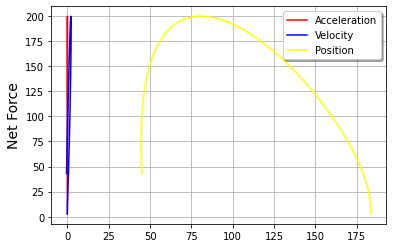

In [88]:
plt.plot(df['Acceleration'], df['Force'], label='Acceleration', color='red')
plt.plot(df['Velocity'], df['Force'], label='Velocity', color='blue')
plt.plot(df['Position'], df['Force'], label='Position', color='yellow')

plt.title('', fontsize=14)
#plt.xlabel('X-Axis', fontsize=14)
plt.ylabel('Net Force', fontsize=14)
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [89]:
# write a function to calculate the force using the new coefficients and append to values to a list
# coefficients using linear regression
M1 = 595.702639
C1 = 77.1863176 
K1 = 0.0981823602

# coefficients using sgd regression
M2 = 872659867.0 
C2 = 47736299200.0 
K2 = -91329637900.0
force_new = []
def my_fcn(M, C, K):
  force_new[:] = []
  for i in range(len(df)):
    force = M*df['Acceleration'][i] + C*df['Velocity'][i] + K*df['Position'][i]
    #print(force)
    force_new.append(force)
  return force_new

In [90]:
# using regression coefficients
my_fcn(M1,C1,K1)
# pass in the calculated force as a new column in the dataframe
df['Force LR'] = force_new
# using gradient descent coefficients
my_fcn(M2,C2,K2)
# pass in the calculated force as a new column in the dataframe
df['Force SGD'] = force_new

In [91]:
df

,Acceleration,Velocity,Position,Force,Force LR,Force SGD
0,0.160962,-0.482996,45.158492,42.924609,63.038717,-4.147225e+12
1,0.155914,-0.327082,44.831410,55.068349,72.034004,-4.109914e+12
2,0.150866,-0.176215,44.655195,66.607411,80.654473,-4.086623e+12
3,0.145818,-0.030397,44.624799,77.556175,88.899630,-4.076890e+12
4,0.140771,0.110374,44.735173,87.929025,96.768979,-4.080255e+12
...,...,...,...,...,...,...
99,-0.034629,0.085888,183.456690,10.286581,4.012945,-1.675096e+13
100,-0.033274,0.052614,183.509304,8.326980,2.257171,-1.675736e+13
101,-0.031919,0.020696,183.530000,6.420293,0.602874,-1.676077e+13
102,-0.030563,-0.009868,183.520132,4.565424,-0.949815,-1.676132e+13


In [92]:
# find rmse
def rmse(force1, force2):
    x = []
    for i in range(len(df)):
      rms = np.sqrt(((force1[i] - force2[i]) ** 2).mean())
      x.append(rms)
    return x

In [93]:
rmse(df['Force'], df['Force LR'])
df['Force-ForceLR RMSE'] = rmse(df['Force'], df['Force LR'])

In [94]:
df

,Acceleration,Velocity,Position,Force,Force LR,Force SGD,Force-ForceLR RMSE
0,0.160962,-0.482996,45.158492,42.924609,63.038717,-4.147225e+12,20.114108
1,0.155914,-0.327082,44.831410,55.068349,72.034004,-4.109914e+12,16.965654
2,0.150866,-0.176215,44.655195,66.607411,80.654473,-4.086623e+12,14.047063
3,0.145818,-0.030397,44.624799,77.556175,88.899630,-4.076890e+12,11.343455
4,0.140771,0.110374,44.735173,87.929025,96.768979,-4.080255e+12,8.839954
...,...,...,...,...,...,...,...
99,-0.034629,0.085888,183.456690,10.286581,4.012945,-1.675096e+13,6.273637
100,-0.033274,0.052614,183.509304,8.326980,2.257171,-1.675736e+13,6.069808
101,-0.031919,0.020696,183.530000,6.420293,0.602874,-1.676077e+13,5.817419
102,-0.030563,-0.009868,183.520132,4.565424,-0.949815,-1.676132e+13,5.515239


Plot the data

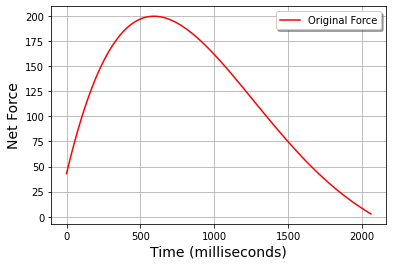

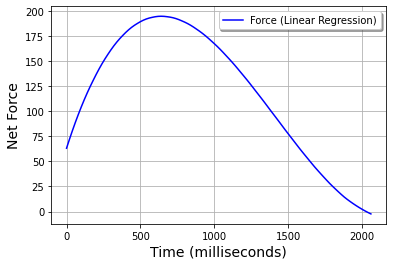

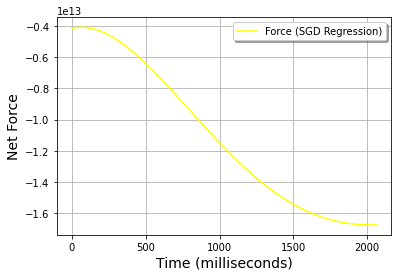

In [95]:
x = np.linspace(0,2060,104)
y0 = df['Force']
y1 = df['Force LR']
y2 = df['Force SGD']

plt.plot(x, y0, label='Original Force', color='red')
plt.title('', fontsize=14)
plt.xlabel('Time (milliseconds)', fontsize=14)
plt.ylabel('Net Force', fontsize=14)
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

plt.plot(x, y1, label='Force (Linear Regression)', color='blue')
plt.title('', fontsize=14)
plt.xlabel('Time (milliseconds)', fontsize=14)
plt.ylabel('Net Force', fontsize=14)
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

plt.plot(x, y2, label='Force (SGD Regression)', color='yellow')
plt.title('', fontsize=14)
plt.xlabel('Time (milliseconds)', fontsize=14)
plt.ylabel('Net Force', fontsize=14)
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


In [97]:
'''
import numpy as np  
import matplotlib.pyplot as plt  
plt.figure() # Create a new figure window
xlist = np.linspace(-2.0, 2.0, 100) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(-2.0, 2.0, 100) 
X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
F = X**3 + Y**3 - 1  #  'Circle Equation
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')
plt.show()
'''

"\nimport numpy as np  \nimport matplotlib.pyplot as plt  \nplt.figure() # Create a new figure window\nxlist = np.linspace(-2.0, 2.0, 100) # Create 1-D arrays for x,y dimensions\nylist = np.linspace(-2.0, 2.0, 100) \nX,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values\nF = X**3 + Y**3 - 1  #  'Circle Equation\nplt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')\nplt.show()\n"